In [1]:
import keras
import numpy as np
from keras.layers import Activation, Input, Dropout, merge,concatenate
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.layers import Conv2D,Conv2DTranspose,Flatten,Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU,ReLU
from keras.models import Model
import cv2
from collections import deque
from keras.optimizers import Adam
import numpy as np

Using TensorFlow backend.


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
x1_train = np.random.randint(200,size=(1000))  / 100
x2_train = np.random.randint(100,size=(1000))  / 100 + 0.01
x_train = np.stack([x1_train,x2_train],1)
y_train = x1_train / x2_train

In [25]:
# network weights
input_layer = Input(shape=(2,), name="unet_input")
fc1 = Dense(64)(input_layer)
fc1 = LeakyReLU(0.2)(fc1)
fc2 = Dense(32)(fc1)
fc2 = LeakyReLU(0.2)(fc2)
fc3 = Dense(16)(fc2)
fc3 = LeakyReLU(0.2)(fc3)
#get Q_value
output_layer= Dense(1)(fc3)
model = Model(input=[input_layer], output=[output_layer], name='Q_net')
model.compile(loss='mse',optimizer=Adam(lr=0.0001))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(name="Q_net", inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  # This is added back by InteractiveShellApp.init_path()


In [26]:
history3 = model.fit(x_train,y_train,batch_size = 32,epochs=1000)

Epoch 1/1000
1000/1000 [==============================] - 0s 142us/step - loss: 110.5855
Epoch 2/1000
1000/1000 [==============================] - 0s 59us/step - loss: 109.3149
Epoch 3/1000
1000/1000 [==============================] - 0s 57us/step - loss: 108.1276
Epoch 4/1000
1000/1000 [==============================] - 0s 58us/step - loss: 107.0348
Epoch 5/1000
1000/1000 [==============================] - 0s 58us/step - loss: 105.8697
Epoch 6/1000
1000/1000 [==============================] - 0s 59us/step - loss: 104.5095
Epoch 7/1000
1000/1000 [==============================] - 0s 59us/step - loss: 103.0786
Epoch 8/1000
1000/1000 [==============================] - 0s 59us/step - loss: 101.6373
Epoch 9/1000
1000/1000 [==============================] - 0s 57us/step - loss: 100.0400
Epoch 10/1000
1000/1000 [==============================] - 0s 57us/step - loss: 98.3824
Epoch 11/1000
1000/1000 [==============================] - 0s 58us/step - loss: 96.7522
Epoch 12/1000
1000/1000 [======

1000/1000 [==============================] - 0s 83us/step - loss: 50.0703
Epoch 95/1000
1000/1000 [==============================] - 0s 80us/step - loss: 49.8330
Epoch 96/1000
1000/1000 [==============================] - 0s 81us/step - loss: 49.5446
Epoch 97/1000
1000/1000 [==============================] - 0s 80us/step - loss: 49.2940
Epoch 98/1000
1000/1000 [==============================] - 0s 88us/step - loss: 49.0731
Epoch 99/1000
1000/1000 [==============================] - 0s 90us/step - loss: 48.7758
Epoch 100/1000
1000/1000 [==============================] - 0s 93us/step - loss: 48.5629
Epoch 101/1000
1000/1000 [==============================] - 0s 91us/step - loss: 48.2489
Epoch 102/1000
1000/1000 [==============================] - 0s 90us/step - loss: 48.0336
Epoch 103/1000
1000/1000 [==============================] - 0s 90us/step - loss: 47.7812
Epoch 104/1000
1000/1000 [==============================] - 0s 89us/step - loss: 47.5125
Epoch 105/1000
1000/1000 [===============

1000/1000 [==============================] - 0s 90us/step - loss: 31.0228
Epoch 187/1000
1000/1000 [==============================] - 0s 88us/step - loss: 30.8453
Epoch 188/1000
1000/1000 [==============================] - 0s 90us/step - loss: 30.6503
Epoch 189/1000
1000/1000 [==============================] - 0s 95us/step - loss: 30.5661
Epoch 190/1000
1000/1000 [==============================] - 0s 90us/step - loss: 30.6733
Epoch 191/1000
1000/1000 [==============================] - 0s 89us/step - loss: 30.2098
Epoch 192/1000
1000/1000 [==============================] - 0s 90us/step - loss: 30.0712
Epoch 193/1000
1000/1000 [==============================] - 0s 90us/step - loss: 29.9480
Epoch 194/1000
1000/1000 [==============================] - 0s 91us/step - loss: 29.8572
Epoch 195/1000
1000/1000 [==============================] - 0s 92us/step - loss: 29.6814
Epoch 196/1000
1000/1000 [==============================] - 0s 91us/step - loss: 29.5641
Epoch 197/1000
1000/1000 [==========

Epoch 278/1000
1000/1000 [==============================] - 0s 103us/step - loss: 19.6967
Epoch 279/1000
1000/1000 [==============================] - 0s 102us/step - loss: 19.7259
Epoch 280/1000
1000/1000 [==============================] - 0s 103us/step - loss: 19.4957
Epoch 281/1000
1000/1000 [==============================] - 0s 102us/step - loss: 19.4471
Epoch 282/1000
1000/1000 [==============================] - 0s 105us/step - loss: 19.3012
Epoch 283/1000
1000/1000 [==============================] - 0s 105us/step - loss: 19.1730
Epoch 284/1000
1000/1000 [==============================] - 0s 103us/step - loss: 19.0890
Epoch 285/1000
1000/1000 [==============================] - 0s 102us/step - loss: 18.9747
Epoch 286/1000
1000/1000 [==============================] - 0s 103us/step - loss: 18.9281
Epoch 287/1000
1000/1000 [==============================] - 0s 105us/step - loss: 18.9069
Epoch 288/1000
1000/1000 [==============================] - 0s 101us/step - loss: 18.8435
Epoch 289/

1000/1000 [==============================] - 0s 105us/step - loss: 12.8979
Epoch 370/1000
1000/1000 [==============================] - 0s 104us/step - loss: 12.9300
Epoch 371/1000
1000/1000 [==============================] - 0s 102us/step - loss: 12.8167
Epoch 372/1000
1000/1000 [==============================] - 0s 103us/step - loss: 12.8110
Epoch 373/1000
1000/1000 [==============================] - 0s 103us/step - loss: 12.7311
Epoch 374/1000
1000/1000 [==============================] - 0s 102us/step - loss: 12.6756
Epoch 375/1000
1000/1000 [==============================] - 0s 104us/step - loss: 12.6429
Epoch 376/1000
1000/1000 [==============================] - 0s 104us/step - loss: 12.5963
Epoch 377/1000
1000/1000 [==============================] - 0s 102us/step - loss: 12.5670
Epoch 378/1000
1000/1000 [==============================] - 0s 103us/step - loss: 12.4559
Epoch 379/1000
1000/1000 [==============================] - 0s 104us/step - loss: 12.5195
Epoch 380/1000
1000/1000 

1000/1000 [==============================] - 0s 102us/step - loss: 9.3590
Epoch 461/1000
1000/1000 [==============================] - 0s 103us/step - loss: 9.3500
Epoch 462/1000
1000/1000 [==============================] - 0s 102us/step - loss: 9.3652
Epoch 463/1000
1000/1000 [==============================] - 0s 104us/step - loss: 9.2684
Epoch 464/1000
1000/1000 [==============================] - 0s 103us/step - loss: 9.2480
Epoch 465/1000
1000/1000 [==============================] - 0s 104us/step - loss: 9.2226
Epoch 466/1000
1000/1000 [==============================] - 0s 104us/step - loss: 9.2339
Epoch 467/1000
1000/1000 [==============================] - 0s 104us/step - loss: 9.1475
Epoch 468/1000
1000/1000 [==============================] - 0s 104us/step - loss: 9.1767
Epoch 469/1000
1000/1000 [==============================] - 0s 103us/step - loss: 9.1203
Epoch 470/1000
1000/1000 [==============================] - 0s 102us/step - loss: 9.1522
Epoch 471/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 77us/step - loss: 7.0830
Epoch 553/1000
1000/1000 [==============================] - 0s 76us/step - loss: 7.0190
Epoch 554/1000
1000/1000 [==============================] - 0s 75us/step - loss: 7.1765
Epoch 555/1000
1000/1000 [==============================] - 0s 76us/step - loss: 7.0386
Epoch 556/1000
1000/1000 [==============================] - 0s 78us/step - loss: 6.9403
Epoch 557/1000
1000/1000 [==============================] - 0s 79us/step - loss: 6.9050
Epoch 558/1000
1000/1000 [==============================] - 0s 77us/step - loss: 6.9585
Epoch 559/1000
1000/1000 [==============================] - 0s 76us/step - loss: 6.9304
Epoch 560/1000
1000/1000 [==============================] - 0s 85us/step - loss: 6.9088
Epoch 561/1000
1000/1000 [==============================] - 0s 85us/step - loss: 6.9592
Epoch 562/1000
1000/1000 [==============================] - 0s 84us/step - loss: 6.8724
Epoch 563/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 111us/step - loss: 5.5038
Epoch 646/1000
1000/1000 [==============================] - 0s 112us/step - loss: 5.5336
Epoch 647/1000
1000/1000 [==============================] - 0s 110us/step - loss: 5.5175
Epoch 648/1000
1000/1000 [==============================] - 0s 107us/step - loss: 5.4685
Epoch 649/1000
1000/1000 [==============================] - 0s 111us/step - loss: 5.5108
Epoch 650/1000
1000/1000 [==============================] - 0s 111us/step - loss: 5.4280
Epoch 651/1000
1000/1000 [==============================] - 0s 111us/step - loss: 5.4607
Epoch 652/1000
1000/1000 [==============================] - 0s 109us/step - loss: 5.5087
Epoch 653/1000
1000/1000 [==============================] - 0s 109us/step - loss: 5.4402
Epoch 654/1000
1000/1000 [==============================] - 0s 108us/step - loss: 5.4241
Epoch 655/1000
1000/1000 [==============================] - 0s 111us/step - loss: 5.4915
Epoch 656/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 109us/step - loss: 4.4631
Epoch 738/1000
1000/1000 [==============================] - 0s 107us/step - loss: 4.4404
Epoch 739/1000
1000/1000 [==============================] - 0s 109us/step - loss: 4.4886
Epoch 740/1000
1000/1000 [==============================] - 0s 110us/step - loss: 4.4926
Epoch 741/1000
1000/1000 [==============================] - 0s 112us/step - loss: 4.4362
Epoch 742/1000
1000/1000 [==============================] - 0s 115us/step - loss: 4.4608
Epoch 743/1000
1000/1000 [==============================] - 0s 110us/step - loss: 4.4330
Epoch 744/1000
1000/1000 [==============================] - 0s 111us/step - loss: 4.4458
Epoch 745/1000
1000/1000 [==============================] - 0s 110us/step - loss: 4.4689
Epoch 746/1000
1000/1000 [==============================] - 0s 106us/step - loss: 4.4055
Epoch 747/1000
1000/1000 [==============================] - 0s 110us/step - loss: 4.3274
Epoch 748/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 111us/step - loss: 3.7161
Epoch 830/1000
1000/1000 [==============================] - 0s 111us/step - loss: 3.9099
Epoch 831/1000
1000/1000 [==============================] - 0s 110us/step - loss: 3.5963
Epoch 832/1000
1000/1000 [==============================] - 0s 112us/step - loss: 3.5948
Epoch 833/1000
1000/1000 [==============================] - 0s 110us/step - loss: 3.5664
Epoch 834/1000
1000/1000 [==============================] - 0s 112us/step - loss: 3.5596
Epoch 835/1000
1000/1000 [==============================] - 0s 107us/step - loss: 3.5771
Epoch 836/1000
1000/1000 [==============================] - 0s 110us/step - loss: 3.5488
Epoch 837/1000
1000/1000 [==============================] - 0s 110us/step - loss: 3.5811
Epoch 838/1000
1000/1000 [==============================] - 0s 112us/step - loss: 3.7166
Epoch 839/1000
1000/1000 [==============================] - 0s 110us/step - loss: 3.5190
Epoch 840/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 111us/step - loss: 2.9273
Epoch 922/1000
1000/1000 [==============================] - 0s 112us/step - loss: 2.9671
Epoch 923/1000
1000/1000 [==============================] - 0s 107us/step - loss: 2.9091
Epoch 924/1000
1000/1000 [==============================] - 0s 108us/step - loss: 2.9085
Epoch 925/1000
1000/1000 [==============================] - 0s 112us/step - loss: 2.9394
Epoch 926/1000
1000/1000 [==============================] - 0s 112us/step - loss: 2.8597
Epoch 927/1000
1000/1000 [==============================] - 0s 112us/step - loss: 2.8592
Epoch 928/1000
1000/1000 [==============================] - 0s 110us/step - loss: 2.8740
Epoch 929/1000
1000/1000 [==============================] - 0s 111us/step - loss: 2.8306
Epoch 930/1000
1000/1000 [==============================] - 0s 109us/step - loss: 2.8791
Epoch 931/1000
1000/1000 [==============================] - 0s 109us/step - loss: 2.8327
Epoch 932/1000
1000/1000 [==========

In [20]:
history2 = model.fit(x_train,y_train,batch_size = 32,epochs=1000)

Epoch 1/1000
1000/1000 [==============================] - 0s 90us/step - loss: 106.8922
Epoch 2/1000
1000/1000 [==============================] - 0s 41us/step - loss: 106.4346
Epoch 3/1000
1000/1000 [==============================] - 0s 41us/step - loss: 105.9758
Epoch 4/1000
1000/1000 [==============================] - 0s 43us/step - loss: 105.5166
Epoch 5/1000
1000/1000 [==============================] - 0s 43us/step - loss: 105.0531
Epoch 6/1000
1000/1000 [==============================] - 0s 44us/step - loss: 104.5892
Epoch 7/1000
1000/1000 [==============================] - 0s 45us/step - loss: 104.1202
Epoch 8/1000
1000/1000 [==============================] - 0s 46us/step - loss: 103.6436
Epoch 9/1000
1000/1000 [==============================] - 0s 64us/step - loss: 103.1568
Epoch 10/1000
1000/1000 [==============================] - 0s 64us/step - loss: 102.6366
Epoch 11/1000
1000/1000 [==============================] - 0s 67us/step - loss: 102.1117
Epoch 12/1000
1000/1000 [=====

1000/1000 [==============================] - 0s 87us/step - loss: 74.4255
Epoch 95/1000
1000/1000 [==============================] - 0s 87us/step - loss: 74.2482
Epoch 96/1000
1000/1000 [==============================] - 0s 87us/step - loss: 74.0558
Epoch 97/1000
1000/1000 [==============================] - 0s 86us/step - loss: 73.8728
Epoch 98/1000
1000/1000 [==============================] - 0s 88us/step - loss: 73.7101
Epoch 99/1000
1000/1000 [==============================] - 0s 87us/step - loss: 73.5204
Epoch 100/1000
1000/1000 [==============================] - 0s 86us/step - loss: 73.3443
Epoch 101/1000
1000/1000 [==============================] - 0s 87us/step - loss: 73.1793
Epoch 102/1000
1000/1000 [==============================] - 0s 86us/step - loss: 73.0078
Epoch 103/1000
1000/1000 [==============================] - 0s 87us/step - loss: 72.8425
Epoch 104/1000
1000/1000 [==============================] - 0s 88us/step - loss: 72.6774
Epoch 105/1000
1000/1000 [===============

1000/1000 [==============================] - 0s 88us/step - loss: 65.1454
Epoch 187/1000
1000/1000 [==============================] - 0s 88us/step - loss: 65.0979
Epoch 188/1000
1000/1000 [==============================] - 0s 89us/step - loss: 65.0530
Epoch 189/1000
1000/1000 [==============================] - 0s 87us/step - loss: 65.0166
Epoch 190/1000
1000/1000 [==============================] - 0s 87us/step - loss: 64.9747
Epoch 191/1000
1000/1000 [==============================] - 0s 86us/step - loss: 64.9366
Epoch 192/1000
1000/1000 [==============================] - 0s 86us/step - loss: 64.8833
Epoch 193/1000
1000/1000 [==============================] - 0s 87us/step - loss: 64.8484
Epoch 194/1000
1000/1000 [==============================] - 0s 86us/step - loss: 64.7866
Epoch 195/1000
1000/1000 [==============================] - 0s 86us/step - loss: 64.7420
Epoch 196/1000
1000/1000 [==============================] - 0s 86us/step - loss: 64.6950
Epoch 197/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 72us/step - loss: 61.4714
Epoch 279/1000
1000/1000 [==============================] - 0s 70us/step - loss: 61.4291
Epoch 280/1000
1000/1000 [==============================] - 0s 70us/step - loss: 61.3887
Epoch 281/1000
1000/1000 [==============================] - 0s 70us/step - loss: 61.3491
Epoch 282/1000
1000/1000 [==============================] - 0s 70us/step - loss: 61.3089
Epoch 283/1000
1000/1000 [==============================] - 0s 71us/step - loss: 61.2713
Epoch 284/1000
1000/1000 [==============================] - 0s 85us/step - loss: 61.2239
Epoch 285/1000
1000/1000 [==============================] - 0s 82us/step - loss: 61.1817
Epoch 286/1000
1000/1000 [==============================] - 0s 83us/step - loss: 61.1469
Epoch 287/1000
1000/1000 [==============================] - 0s 80us/step - loss: 61.1043
Epoch 288/1000
1000/1000 [==============================] - 0s 82us/step - loss: 61.0569
Epoch 289/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 87us/step - loss: 57.8200
Epoch 371/1000
1000/1000 [==============================] - 0s 81us/step - loss: 57.7706
Epoch 372/1000
1000/1000 [==============================] - 0s 83us/step - loss: 57.7308
Epoch 373/1000
1000/1000 [==============================] - 0s 86us/step - loss: 57.6971
Epoch 374/1000
1000/1000 [==============================] - 0s 84us/step - loss: 57.6623
Epoch 375/1000
1000/1000 [==============================] - 0s 83us/step - loss: 57.6183
Epoch 376/1000
1000/1000 [==============================] - 0s 82us/step - loss: 57.5917
Epoch 377/1000
1000/1000 [==============================] - 0s 82us/step - loss: 57.5487
Epoch 378/1000
1000/1000 [==============================] - 0s 82us/step - loss: 57.5098
Epoch 379/1000
1000/1000 [==============================] - 0s 81us/step - loss: 57.4732
Epoch 380/1000
1000/1000 [==============================] - 0s 82us/step - loss: 57.4287
Epoch 381/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 97us/step - loss: 54.4905
Epoch 463/1000
1000/1000 [==============================] - 0s 98us/step - loss: 54.4617
Epoch 464/1000
1000/1000 [==============================] - 0s 98us/step - loss: 54.4136
Epoch 465/1000
1000/1000 [==============================] - 0s 98us/step - loss: 54.3806
Epoch 466/1000
1000/1000 [==============================] - 0s 97us/step - loss: 54.3480
Epoch 467/1000
1000/1000 [==============================] - 0s 98us/step - loss: 54.3091
Epoch 468/1000
1000/1000 [==============================] - 0s 101us/step - loss: 54.2826
Epoch 469/1000
1000/1000 [==============================] - 0s 99us/step - loss: 54.2379
Epoch 470/1000
1000/1000 [==============================] - 0s 98us/step - loss: 54.2123
Epoch 471/1000
1000/1000 [==============================] - 0s 98us/step - loss: 54.1769
Epoch 472/1000
1000/1000 [==============================] - 0s 98us/step - loss: 54.1434
Epoch 473/1000
1000/1000 [=========

1000/1000 [==============================] - 0s 98us/step - loss: 51.4788
Epoch 555/1000
1000/1000 [==============================] - 0s 102us/step - loss: 51.4445
Epoch 556/1000
1000/1000 [==============================] - 0s 44us/step - loss: 51.4191
Epoch 557/1000
1000/1000 [==============================] - 0s 40us/step - loss: 51.3947
Epoch 558/1000
1000/1000 [==============================] - 0s 40us/step - loss: 51.3650
Epoch 559/1000
1000/1000 [==============================] - 0s 39us/step - loss: 51.3270
Epoch 560/1000
1000/1000 [==============================] - 0s 40us/step - loss: 51.3047
Epoch 561/1000
1000/1000 [==============================] - 0s 42us/step - loss: 51.2697
Epoch 562/1000
1000/1000 [==============================] - 0s 50us/step - loss: 51.2439
Epoch 563/1000
1000/1000 [==============================] - 0s 51us/step - loss: 51.2122
Epoch 564/1000
1000/1000 [==============================] - 0s 58us/step - loss: 51.1787
Epoch 565/1000
1000/1000 [=========

1000/1000 [==============================] - 0s 104us/step - loss: 48.7802
Epoch 647/1000
1000/1000 [==============================] - 0s 103us/step - loss: 48.7523
Epoch 648/1000
1000/1000 [==============================] - 0s 106us/step - loss: 48.7254
Epoch 649/1000
1000/1000 [==============================] - 0s 105us/step - loss: 48.6932
Epoch 650/1000
1000/1000 [==============================] - 0s 104us/step - loss: 48.6653
Epoch 651/1000
1000/1000 [==============================] - 0s 107us/step - loss: 48.6367
Epoch 652/1000
1000/1000 [==============================] - 0s 105us/step - loss: 48.6115
Epoch 653/1000
1000/1000 [==============================] - 0s 105us/step - loss: 48.5885
Epoch 654/1000
1000/1000 [==============================] - 0s 105us/step - loss: 48.5519
Epoch 655/1000
1000/1000 [==============================] - 0s 104us/step - loss: 48.5161
Epoch 656/1000
1000/1000 [==============================] - 0s 104us/step - loss: 48.4883
Epoch 657/1000
1000/1000 

1000/1000 [==============================] - 0s 50us/step - loss: 46.2209
Epoch 738/1000
1000/1000 [==============================] - 0s 49us/step - loss: 46.1758
Epoch 739/1000
1000/1000 [==============================] - 0s 53us/step - loss: 46.1526
Epoch 740/1000
1000/1000 [==============================] - 0s 56us/step - loss: 46.1215
Epoch 741/1000
1000/1000 [==============================] - 0s 56us/step - loss: 46.0933
Epoch 742/1000
1000/1000 [==============================] - 0s 55us/step - loss: 46.0741
Epoch 743/1000
1000/1000 [==============================] - 0s 56us/step - loss: 46.0401
Epoch 744/1000
1000/1000 [==============================] - 0s 55us/step - loss: 46.0171
Epoch 745/1000
1000/1000 [==============================] - 0s 55us/step - loss: 45.9884
Epoch 746/1000
1000/1000 [==============================] - 0s 56us/step - loss: 45.9657
Epoch 747/1000
1000/1000 [==============================] - 0s 57us/step - loss: 45.9312
Epoch 748/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 59us/step - loss: 43.7561
Epoch 830/1000
1000/1000 [==============================] - 0s 58us/step - loss: 43.7298
Epoch 831/1000
1000/1000 [==============================] - 0s 58us/step - loss: 43.6969
Epoch 832/1000
1000/1000 [==============================] - 0s 59us/step - loss: 43.6736
Epoch 833/1000
1000/1000 [==============================] - 0s 58us/step - loss: 43.6531
Epoch 834/1000
1000/1000 [==============================] - 0s 56us/step - loss: 43.6193
Epoch 835/1000
1000/1000 [==============================] - 0s 58us/step - loss: 43.5965
Epoch 836/1000
1000/1000 [==============================] - 0s 60us/step - loss: 43.5722
Epoch 837/1000
1000/1000 [==============================] - 0s 57us/step - loss: 43.5402
Epoch 838/1000
1000/1000 [==============================] - 0s 57us/step - loss: 43.5146
Epoch 839/1000
1000/1000 [==============================] - 0s 59us/step - loss: 43.5050
Epoch 840/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 66us/step - loss: 41.4536
Epoch 922/1000
1000/1000 [==============================] - 0s 65us/step - loss: 41.4293
Epoch 923/1000
1000/1000 [==============================] - 0s 65us/step - loss: 41.4082
Epoch 924/1000
1000/1000 [==============================] - 0s 65us/step - loss: 41.3891
Epoch 925/1000
1000/1000 [==============================] - 0s 65us/step - loss: 41.3608
Epoch 926/1000
1000/1000 [==============================] - 0s 65us/step - loss: 41.3378
Epoch 927/1000
1000/1000 [==============================] - 0s 65us/step - loss: 41.3172
Epoch 928/1000
1000/1000 [==============================] - 0s 65us/step - loss: 41.2954
Epoch 929/1000
1000/1000 [==============================] - 0s 65us/step - loss: 41.2662
Epoch 930/1000
1000/1000 [==============================] - 0s 65us/step - loss: 41.2414
Epoch 931/1000
1000/1000 [==============================] - 0s 66us/step - loss: 41.2211
Epoch 932/1000
1000/1000 [==========

In [17]:
history = model.fit(x_train,y_train,batch_size = 32,epochs=1000)

Epoch 1/1000
1000/1000 [==============================] - 0s 113us/step - loss: 108.1793
Epoch 2/1000
1000/1000 [==============================] - 0s 50us/step - loss: 107.0324
Epoch 3/1000
1000/1000 [==============================] - 0s 61us/step - loss: 105.5790
Epoch 4/1000
1000/1000 [==============================] - 0s 60us/step - loss: 103.9183
Epoch 5/1000
1000/1000 [==============================] - 0s 83us/step - loss: 102.2957
Epoch 6/1000
1000/1000 [==============================] - 0s 86us/step - loss: 100.7443
Epoch 7/1000
1000/1000 [==============================] - 0s 85us/step - loss: 99.1678
Epoch 8/1000
1000/1000 [==============================] - 0s 86us/step - loss: 97.5873
Epoch 9/1000
1000/1000 [==============================] - 0s 84us/step - loss: 96.1422
Epoch 10/1000
1000/1000 [==============================] - 0s 86us/step - loss: 94.7621
Epoch 11/1000
1000/1000 [==============================] - 0s 86us/step - loss: 93.5163
Epoch 12/1000
1000/1000 [=========

1000/1000 [==============================] - 0s 154us/step - loss: 53.6030
Epoch 94/1000
1000/1000 [==============================] - 0s 154us/step - loss: 53.3497
Epoch 95/1000
1000/1000 [==============================] - 0s 159us/step - loss: 53.1905
Epoch 96/1000
1000/1000 [==============================] - 0s 154us/step - loss: 52.9695
Epoch 97/1000
1000/1000 [==============================] - 0s 154us/step - loss: 52.7938
Epoch 98/1000
1000/1000 [==============================] - 0s 155us/step - loss: 52.5800
Epoch 99/1000
1000/1000 [==============================] - 0s 156us/step - loss: 52.4321
Epoch 100/1000
1000/1000 [==============================] - 0s 157us/step - loss: 52.1937
Epoch 101/1000
1000/1000 [==============================] - 0s 158us/step - loss: 52.0168
Epoch 102/1000
1000/1000 [==============================] - 0s 154us/step - loss: 51.8671
Epoch 103/1000
1000/1000 [==============================] - 0s 156us/step - loss: 51.6339
Epoch 104/1000
1000/1000 [=====

1000/1000 [==============================] - 0s 154us/step - loss: 39.4691
Epoch 185/1000
1000/1000 [==============================] - 0s 158us/step - loss: 39.3284
Epoch 186/1000
1000/1000 [==============================] - 0s 156us/step - loss: 39.2505
Epoch 187/1000
1000/1000 [==============================] - 0s 155us/step - loss: 39.0806
Epoch 188/1000
1000/1000 [==============================] - 0s 155us/step - loss: 38.9745
Epoch 189/1000
1000/1000 [==============================] - 0s 158us/step - loss: 38.8349
Epoch 190/1000
1000/1000 [==============================] - 0s 156us/step - loss: 38.7673
Epoch 191/1000
1000/1000 [==============================] - 0s 154us/step - loss: 38.5842
Epoch 192/1000
1000/1000 [==============================] - 0s 156us/step - loss: 38.5011
Epoch 193/1000
1000/1000 [==============================] - 0s 154us/step - loss: 38.3787
Epoch 194/1000
1000/1000 [==============================] - 0s 154us/step - loss: 38.3001
Epoch 195/1000
1000/1000 

1000/1000 [==============================] - 0s 155us/step - loss: 30.5632
Epoch 276/1000
1000/1000 [==============================] - 0s 153us/step - loss: 30.3868
Epoch 277/1000
1000/1000 [==============================] - 0s 157us/step - loss: 30.3260
Epoch 278/1000
1000/1000 [==============================] - 0s 153us/step - loss: 30.2597
Epoch 279/1000
1000/1000 [==============================] - 0s 154us/step - loss: 30.1861
Epoch 280/1000
1000/1000 [==============================] - 0s 154us/step - loss: 30.1401
Epoch 281/1000
1000/1000 [==============================] - 0s 156us/step - loss: 30.0139
Epoch 282/1000
1000/1000 [==============================] - 0s 154us/step - loss: 29.9510
Epoch 283/1000
1000/1000 [==============================] - 0s 155us/step - loss: 29.9123
Epoch 284/1000
1000/1000 [==============================] - 0s 155us/step - loss: 29.8050
Epoch 285/1000
1000/1000 [==============================] - 0s 154us/step - loss: 29.7274
Epoch 286/1000
1000/1000 

1000/1000 [==============================] - 0s 109us/step - loss: 24.1529
Epoch 367/1000
1000/1000 [==============================] - 0s 105us/step - loss: 24.0715
Epoch 368/1000
1000/1000 [==============================] - 0s 105us/step - loss: 24.0402
Epoch 369/1000
1000/1000 [==============================] - 0s 108us/step - loss: 23.9524
Epoch 370/1000
1000/1000 [==============================] - 0s 105us/step - loss: 23.9226
Epoch 371/1000
1000/1000 [==============================] - 0s 106us/step - loss: 23.8299
Epoch 372/1000
1000/1000 [==============================] - 0s 106us/step - loss: 23.7939
Epoch 373/1000
1000/1000 [==============================] - 0s 107us/step - loss: 23.7637
Epoch 374/1000
1000/1000 [==============================] - 0s 105us/step - loss: 23.6515
Epoch 375/1000
1000/1000 [==============================] - 0s 106us/step - loss: 23.5944
Epoch 376/1000
1000/1000 [==============================] - 0s 106us/step - loss: 23.5270
Epoch 377/1000
1000/1000 

1000/1000 [==============================] - 0s 145us/step - loss: 19.2373
Epoch 458/1000
1000/1000 [==============================] - 0s 142us/step - loss: 19.1534
Epoch 459/1000
1000/1000 [==============================] - 0s 143us/step - loss: 19.1353
Epoch 460/1000
1000/1000 [==============================] - 0s 143us/step - loss: 19.0878
Epoch 461/1000
1000/1000 [==============================] - 0s 143us/step - loss: 19.0236
Epoch 462/1000
1000/1000 [==============================] - 0s 142us/step - loss: 18.9450
Epoch 463/1000
1000/1000 [==============================] - 0s 143us/step - loss: 18.9748
Epoch 464/1000
1000/1000 [==============================] - 0s 147us/step - loss: 18.8615
Epoch 465/1000
1000/1000 [==============================] - 0s 138us/step - loss: 18.8764
Epoch 466/1000
1000/1000 [==============================] - 0s 49us/step - loss: 18.7453
Epoch 467/1000
1000/1000 [==============================] - 0s 47us/step - loss: 18.7096
Epoch 468/1000
1000/1000 [=

1000/1000 [==============================] - 0s 99us/step - loss: 15.4635
Epoch 549/1000
1000/1000 [==============================] - 0s 99us/step - loss: 15.4094
Epoch 550/1000
1000/1000 [==============================] - 0s 99us/step - loss: 15.3764
Epoch 551/1000
1000/1000 [==============================] - 0s 99us/step - loss: 15.3755
Epoch 552/1000
1000/1000 [==============================] - 0s 101us/step - loss: 15.3696
Epoch 553/1000
1000/1000 [==============================] - 0s 100us/step - loss: 15.2698
Epoch 554/1000
1000/1000 [==============================] - 0s 101us/step - loss: 15.2599
Epoch 555/1000
1000/1000 [==============================] - 0s 100us/step - loss: 15.2398
Epoch 556/1000
1000/1000 [==============================] - 0s 101us/step - loss: 15.1730
Epoch 557/1000
1000/1000 [==============================] - 0s 100us/step - loss: 15.1763
Epoch 558/1000
1000/1000 [==============================] - 0s 99us/step - loss: 15.1279
Epoch 559/1000
1000/1000 [====

1000/1000 [==============================] - 0s 107us/step - loss: 12.7173
Epoch 640/1000
1000/1000 [==============================] - 0s 106us/step - loss: 12.7822
Epoch 641/1000
1000/1000 [==============================] - 0s 111us/step - loss: 12.7333
Epoch 642/1000
1000/1000 [==============================] - 0s 109us/step - loss: 12.6658
Epoch 643/1000
1000/1000 [==============================] - 0s 110us/step - loss: 12.6318
Epoch 644/1000
1000/1000 [==============================] - 0s 107us/step - loss: 12.6142
Epoch 645/1000
1000/1000 [==============================] - 0s 109us/step - loss: 12.6010
Epoch 646/1000
1000/1000 [==============================] - 0s 107us/step - loss: 12.5870
Epoch 647/1000
1000/1000 [==============================] - 0s 108us/step - loss: 12.5410
Epoch 648/1000
1000/1000 [==============================] - 0s 109us/step - loss: 12.5039
Epoch 649/1000
1000/1000 [==============================] - 0s 107us/step - loss: 12.4976
Epoch 650/1000
1000/1000 

1000/1000 [==============================] - 0s 106us/step - loss: 10.8292
Epoch 731/1000
1000/1000 [==============================] - 0s 106us/step - loss: 10.7752
Epoch 732/1000
1000/1000 [==============================] - 0s 109us/step - loss: 10.7520
Epoch 733/1000
1000/1000 [==============================] - 0s 106us/step - loss: 10.7531
Epoch 734/1000
1000/1000 [==============================] - 0s 107us/step - loss: 10.7303
Epoch 735/1000
1000/1000 [==============================] - 0s 106us/step - loss: 10.7564
Epoch 736/1000
1000/1000 [==============================] - 0s 108us/step - loss: 10.6895
Epoch 737/1000
1000/1000 [==============================] - 0s 106us/step - loss: 10.6880
Epoch 738/1000
1000/1000 [==============================] - 0s 108us/step - loss: 10.6725
Epoch 739/1000
1000/1000 [==============================] - 0s 109us/step - loss: 10.7115
Epoch 740/1000
1000/1000 [==============================] - 0s 109us/step - loss: 10.6752
Epoch 741/1000
1000/1000 

1000/1000 [==============================] - 0s 108us/step - loss: 9.3197
Epoch 822/1000
1000/1000 [==============================] - 0s 107us/step - loss: 9.3098
Epoch 823/1000
1000/1000 [==============================] - 0s 111us/step - loss: 9.2720
Epoch 824/1000
1000/1000 [==============================] - 0s 111us/step - loss: 9.2422
Epoch 825/1000
1000/1000 [==============================] - 0s 112us/step - loss: 9.2439
Epoch 826/1000
1000/1000 [==============================] - 0s 52us/step - loss: 9.2204
Epoch 827/1000
1000/1000 [==============================] - 0s 47us/step - loss: 9.2139
Epoch 828/1000
1000/1000 [==============================] - 0s 46us/step - loss: 9.1882
Epoch 829/1000
1000/1000 [==============================] - 0s 46us/step - loss: 9.1949
Epoch 830/1000
1000/1000 [==============================] - 0s 48us/step - loss: 9.1564
Epoch 831/1000
1000/1000 [==============================] - 0s 56us/step - loss: 9.1742
Epoch 832/1000
1000/1000 [================

1000/1000 [==============================] - 0s 100us/step - loss: 8.0434
Epoch 914/1000
1000/1000 [==============================] - 0s 101us/step - loss: 8.0617
Epoch 915/1000
1000/1000 [==============================] - 0s 101us/step - loss: 8.0246
Epoch 916/1000
1000/1000 [==============================] - 0s 100us/step - loss: 8.0728
Epoch 917/1000
1000/1000 [==============================] - 0s 100us/step - loss: 8.0161
Epoch 918/1000
1000/1000 [==============================] - 0s 101us/step - loss: 7.9828
Epoch 919/1000
1000/1000 [==============================] - 0s 101us/step - loss: 8.0041
Epoch 920/1000
1000/1000 [==============================] - 0s 101us/step - loss: 7.9719
Epoch 921/1000
1000/1000 [==============================] - 0s 100us/step - loss: 8.0596
Epoch 922/1000
1000/1000 [==============================] - 0s 100us/step - loss: 8.0366
Epoch 923/1000
1000/1000 [==============================] - 0s 100us/step - loss: 7.9457
Epoch 924/1000
1000/1000 [==========

In [6]:
history.history['loss']

NameError: name 'history' is not defined

In [14]:
import matplotlib.pyplot as plt

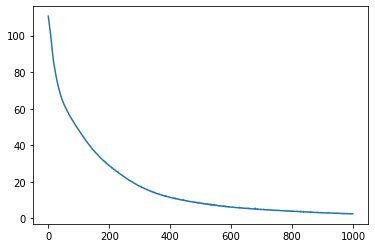

In [27]:
plt.plot(history3.history['loss'])

In [8]:
x1_test = np.random.randint(200,size=(10))  / 100
x2_test = np.random.randint(100,size=(10))  / 100 + 0.01
x_test = np.stack([x1_test,x2_test],1)
y_test = x1_test / x2_test

In [9]:
model.predict(x_test)

array([[1.2060552 ],
       [0.79240465],
       [1.3401036 ],
       [2.2442555 ],
       [1.6011281 ],
       [3.9411893 ],
       [0.18409964],
       [0.07926986],
       [2.5606313 ],
       [2.9595037 ]], dtype=float32)

In [10]:
y_test

array([1.29896907, 0.63636364, 1.25      , 2.38      , 1.64      ,
       3.93939394, 0.21428571, 0.12698413, 2.56923077, 3.05128205])